In [1]:
#import liraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def process_image(image_path):
    # Read image with error handling
    img = cv2.imread(image_path)
    if img is None:
        raise Exception(f"Error loading image from {image_path}. Check if the file exists and is not corrupted.")
    
    # Check if image is empty
    if img.size == 0:
        raise Exception("Loaded image is empty")
        
    # Print image details for debugging
    print(f"Image loaded successfully:")
    print(f"Shape: {img.shape}")
    print(f"Data type: {img.dtype}")
    
    # Rest of the processing remains the same
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = np.uint8(sobel)
    
    canny = cv2.Canny(gray, 100, 200)
    
    _, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = np.zeros_like(gray)
    cv2.drawContours(contour_img, contours, -1, (255,255,255), 1)
    
    # Create figure for plotting
    plt.figure(figsize=(15, 10))
    
    images = [img, gray, binary, otsu, adaptive, laplacian, sobel, canny, contour_img]
    titles = ['Original', 'Grayscale', 'Binary Threshold', "Otsu's Threshold",
              'Adaptive Threshold', 'Laplacian', 'Sobel', 'Canny', 'Contours']
    
    for i in range(len(images)):
        plt.subplot(3, 3, i+1)
        if i == 0:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'original': img,
        'gray': gray,
        'binary': binary,
        'otsu': otsu,
        'adaptive': adaptive,
        'laplacian': laplacian,
        'sobel': sobel,
        'canny': canny,
        'contours': contour_img
    }

Image loaded successfully:
Shape: (1024, 1024, 3)
Data type: uint8


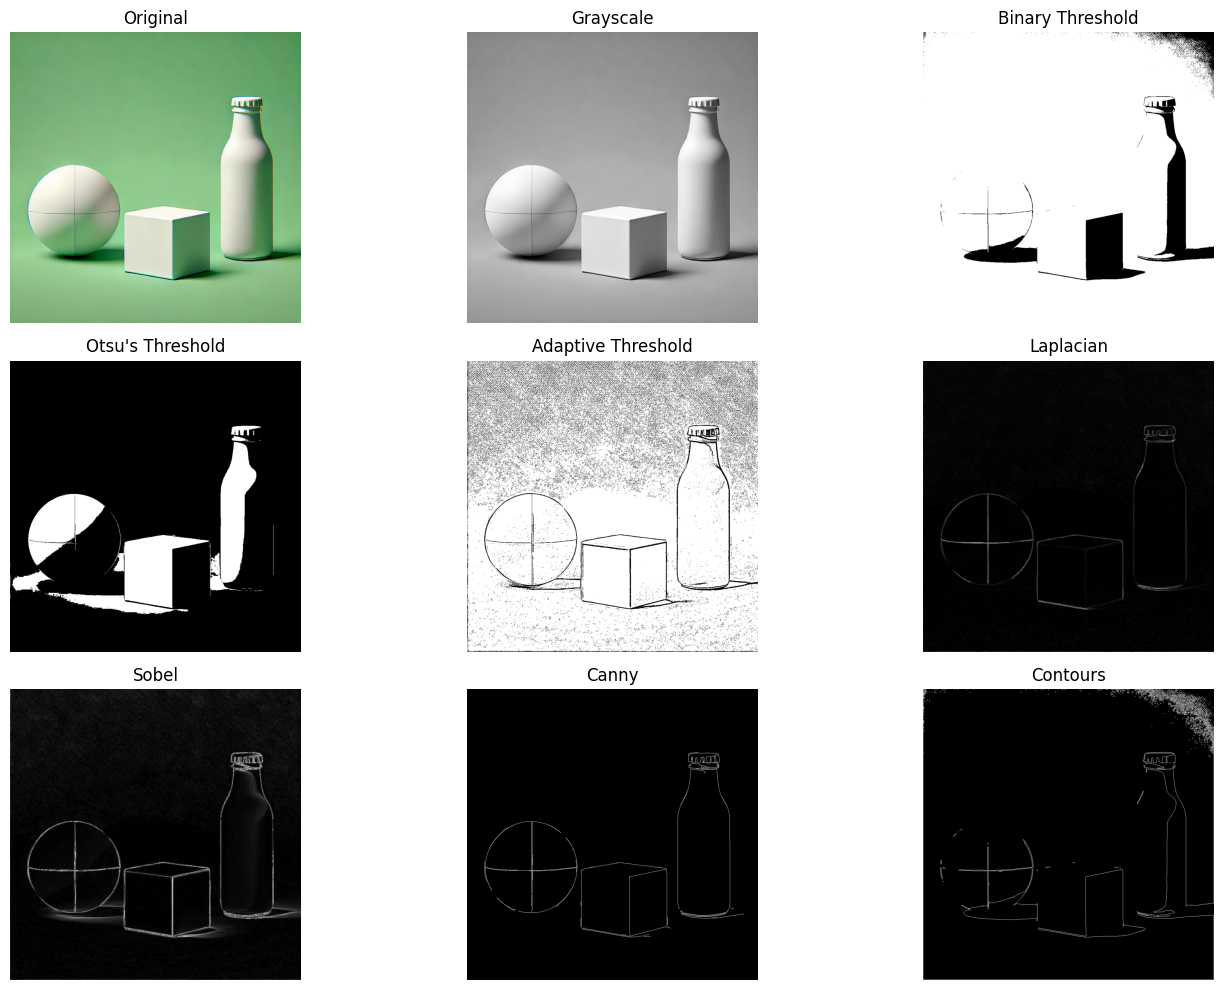

In [6]:
if __name__ == "__main__":
    try:
        # Replace with your WebP image path
        image_path = "image2.webp"
        results = process_image(image_path)
    except Exception as e:
        print(f"Error: {str(e)}")